# Importing the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset....

In [2]:
data = pd.read_csv(r"C:\Users\HP\Downloads\Rainfall.csv")
data.head(3)

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2


# EDA process

In [3]:
data.drop(columns = ['maxtemp','mintemp','dewpoint','winddirection','windspeed'],inplace = True)
# removing the unnecessary columns

In [4]:
data.head(3)

,day,pressure,temparature,humidity,cloud,rainfall,sunshine
0,1,1025.9,18.3,72,49,yes,9.3
1,2,1022.0,18.9,81,83,yes,0.6
2,3,1019.7,19.3,95,91,yes,0.0


In [5]:
data.isnull().sum()

day            0
pressure       0
temparature    0
humidity       0
cloud          0
rainfall       0
sunshine       0
dtype: int64

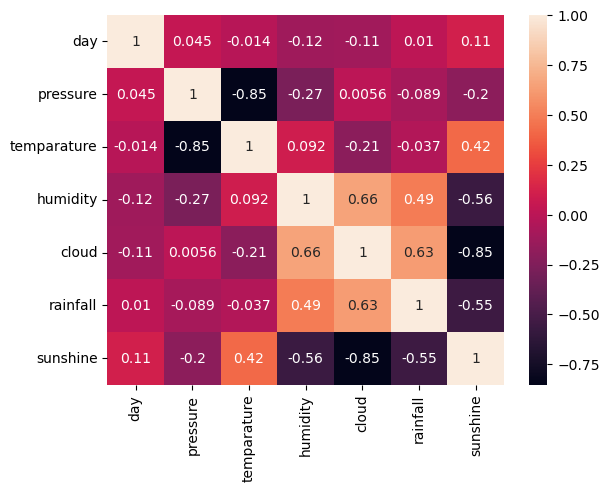

In [13]:
sns.heatmap(data.corr(), annot=True)
plt.show()
#visualiasing thr interrelated columns in our dataset

In [ ]:
# rainfall column in our dataset seems to contain categorical values so we will convert it into numerical with the 
# - help of one hot encoder

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
oh = OneHotEncoder(drop = 'first')

In [9]:
a = data[['rainfall']]

In [10]:
data['rainfall'] = oh.fit_transform(a).toarray()

In [11]:
data.head(3)

,day,pressure,temparature,humidity,cloud,rainfall,sunshine
0,1,1025.9,18.3,72,49,1.0,9.3
1,2,1022.0,18.9,81,83,1.0,0.6
2,3,1019.7,19.3,95,91,1.0,0.0


# intialising input and output variables for training our model...

In [14]:
x = data.drop(columns = 'rainfall',axis = 1)

In [15]:
y = data['rainfall']

In [ ]:
# we will use sckit learn library for spplitting our dataset into training and testing  and then importing our ML model

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state =30,test_size = 0.2)

In [ ]:
# we will use LOGISTIC REGRESSION model for our rainfall data

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

# Accuracy of training and testing Data

In [20]:
lr.score(xtrain,ytrain)*100,lr.score(xtest,ytest)*100

(82.87671232876713, 83.78378378378379)

In [21]:
# so our data gives the accuracy of 83% while predicting the weather it will rain or not 

In [ ]:
# the reason of such low accuracy is that our data is of weather related columns which is usely not built for LOGISTIC REGRESSION type model
# there exist specific machine learning model for the prediction of data like XGBOOST and also with the help of several types of neural network
 # but for now we will not step inside it and use LOGISTIC REGRESSSION in our case...

In [22]:
lr.predict([[2,1022.0,18.9,81,83,0.6]])

C:\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1.])

In [23]:
lr.predict([[27,1000.4,10.8,74,66,5.5]])

C:\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.])

In [24]:
# here in our case 1 stands for it will rain 
#              and 0 for it will not 

# Visualising our prediction column

In [27]:
from mlxtend.plotting import plot_decision_regions

In [29]:
pairs = [('Humidity', 'Pressure'), ('Temperature', 'cloud'), ('rainfall', 'sunshine')]

In [31]:
X_full = data.drop(columns=['rainfall'])
y1 = data['rainfall']

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_full)

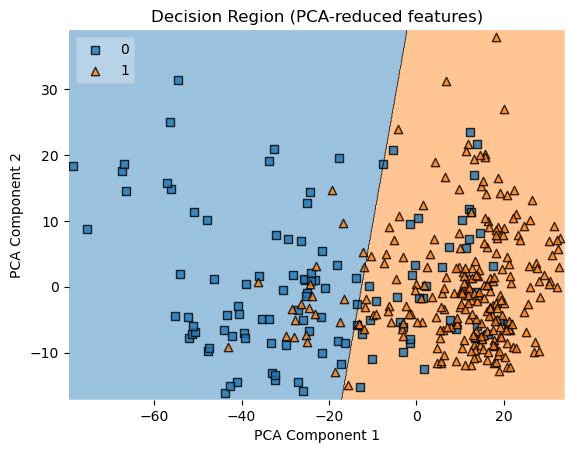

In [33]:
model = LogisticRegression()
model.fit(X_pca, y)

plot_decision_regions(X_pca, y.values, clf=model, legend=2)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Decision Region (PCA-reduced features)')
plt.show()

In [1]:
# that is all of our project I know there are several issues in our project but i will try to rectify them in my next project 

# THANK YOU 